In [58]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from sklearn.feature_extraction.text import CountVectorizer

load_dotenv()

True

### **Utility Functions**

In [59]:
def process_news_data(df, name):
    print(f"\n==== {name} ====")
    print(df.columns)
    
    print(df['pub_date'].head())
    
    df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')

    df = df.dropna(subset=['pub_date'])

    df['pub_date'] = df['pub_date'].dt.tz_localize(None)

    df = df.sort_values('pub_date')

    print("Earliest date:", df['pub_date'].min())
    print("Latest date:", df['pub_date'].max())

    print("Articles per year:")
    print(df['pub_date'].dt.year.value_counts().sort_index())

    print("Articles per month:")
    print(df['pub_date'].dt.to_period('M').value_counts().sort_index())

    return df

def plot_monthly_articles_by_year(df, year):
    df['pub_date'] = pd.to_datetime(df['pub_date'])
    df['year'] = df['pub_date'].dt.year
    df['month'] = df['pub_date'].dt.month

    df_year = df[df['year'] == year]

    if df_year.empty:
        print(f"No data available for the year {year}.")
        return

    monthly_counts = df_year.groupby('month').size().reindex(range(1, 13), fill_value=0)

    plt.figure(figsize=(10, 4))
    ax = monthly_counts.plot(kind='bar', color='steelblue')
    plt.title(f"Number of News Articles per Month - {year}")
    plt.xlabel("Month")
    plt.ylabel("Article Count")
    plt.xticks(ticks=range(12), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ], rotation=45)
    
    for i, v in enumerate(monthly_counts):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)
            
    plt.ylim(0, max(monthly_counts) * 1.15)
    plt.tight_layout()
    plt.show()

### **Load data**

In [60]:
csv_files = glob.glob('../data/nyt_data/nyt_apple*.csv')
csv_files.sort()
merged_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

merged_df['pub_date'] = pd.to_datetime(merged_df['pub_date'], errors='coerce')
merged_df = merged_df.sort_values('pub_date')
merged_df = merged_df.drop_duplicates(subset='web_url')
merged_df = process_news_data(merged_df, "NYT Apple 2021-2025")


==== NYT Apple 2021-2025 ====
Index(['title', 'snippet', 'pub_date', 'web_url', 'section', 'source'], dtype='object')
29    2021-07-19 09:00:10+00:00
587   2021-07-20 09:00:07+00:00
38    2021-07-20 11:00:05+00:00
143   2021-07-20 15:42:40+00:00
142   2021-07-20 16:06:15+00:00
Name: pub_date, dtype: datetime64[ns, UTC]
Earliest date: 2021-07-19 09:00:10
Latest date: 2025-07-16 11:07:17
Articles per year:
pub_date
2021     565
2022    1165
2023     935
2024    1002
2025     655
Name: count, dtype: int64
Articles per month:
pub_date
2021-07     51
2021-08     70
2021-09    125
2021-10    117
2021-11    118
2021-12     84
2022-01    115
2022-02    101
2022-03    134
2022-04     82
2022-05    128
2022-06    132
2022-07    133
2022-08    103
2022-09     57
2022-10     49
2022-11     69
2022-12     62
2023-01     58
2023-02     53
2023-03     51
2023-04     52
2023-05     50
2023-06     89
2023-07     82
2023-08     76
2023-09    123
2023-10     97
2023-11    150
2023-12     54
2024-01    1

In [61]:
print("📊 NEWS DATA OVERVIEW")
print(f"SHAPE: {merged_df.shape}")
print(f"DATE RANGE: {merged_df['pub_date'].iloc[0]} to {merged_df['pub_date'].iloc[-1]}")
print(f"COLUMNS & DATATYPES:\n{merged_df.dtypes}")
print(f"\nMISSING VALUES:\n{merged_df.isna().sum()}")
print(f"\nDUPLICATES:\n{merged_df.duplicated().sum()}")

📊 NEWS DATA OVERVIEW
SHAPE: (4322, 6)
DATE RANGE: 2021-07-19 09:00:10 to 2025-07-16 11:07:17
COLUMNS & DATATYPES:
title               object
snippet             object
pub_date    datetime64[ns]
web_url             object
section             object
source              object
dtype: object

MISSING VALUES:
title         0
snippet     181
pub_date      0
web_url       0
section       3
source        3
dtype: int64

DUPLICATES:
0


### **Data Preprocessing**

In [62]:
print("📊 UPDATED NEWS DATA OVERVIEW")
print(f"SHAPE: {merged_df.shape}")
print(f"DATE RANGE: {merged_df['pub_date'].iloc[0]} to {merged_df['pub_date'].iloc[-1]}")

# Manual fixes
merged_df.at[2331, 'section'] = 'Technology'
merged_df.loc[[3544, 3495], 'section'] = 'Food'

merged_df['snippet'] = merged_df['snippet'].fillna('No content available')
merged_df['source'] = merged_df['source'].fillna(merged_df['source'].mode()[0])

print(f"MISSING VALUES:\n{merged_df.isna().sum()}")

📊 NEWS DATA OVERVIEW
SHAPE: (4322, 6)
DATE RANGE: 2021-07-19 09:00:10 to 2025-07-16 11:07:17
MISSING VALUES:
title       0
snippet     0
pub_date    0
web_url     0
section     0
source      0
dtype: int64


### **Plot temporal distributions**

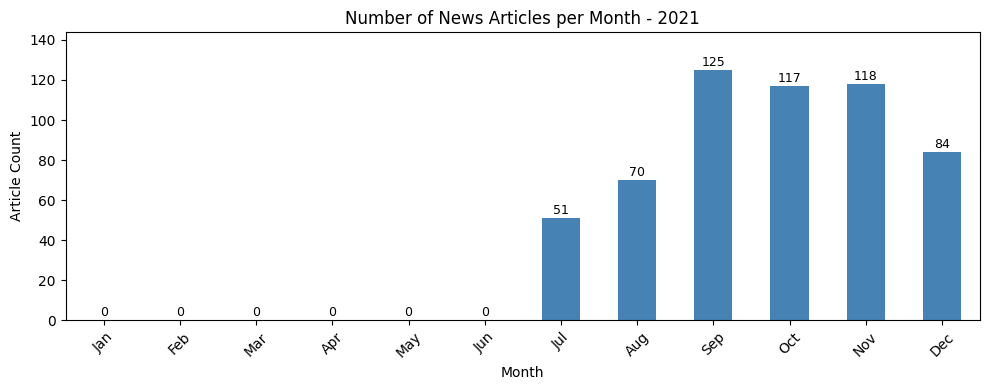

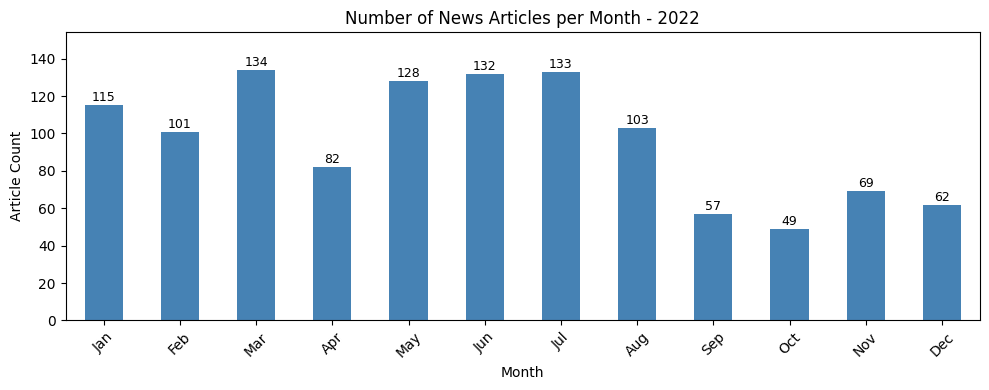

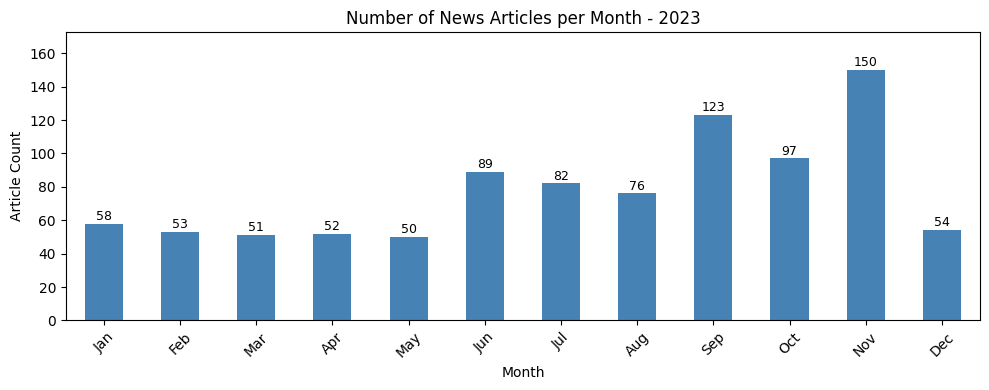

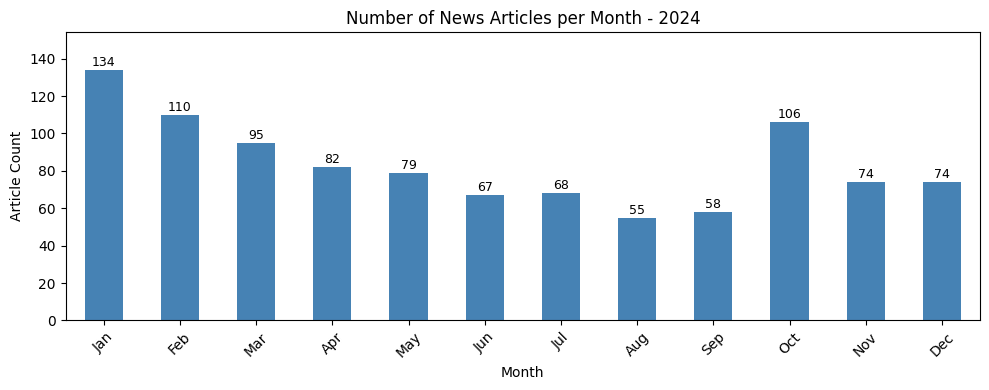

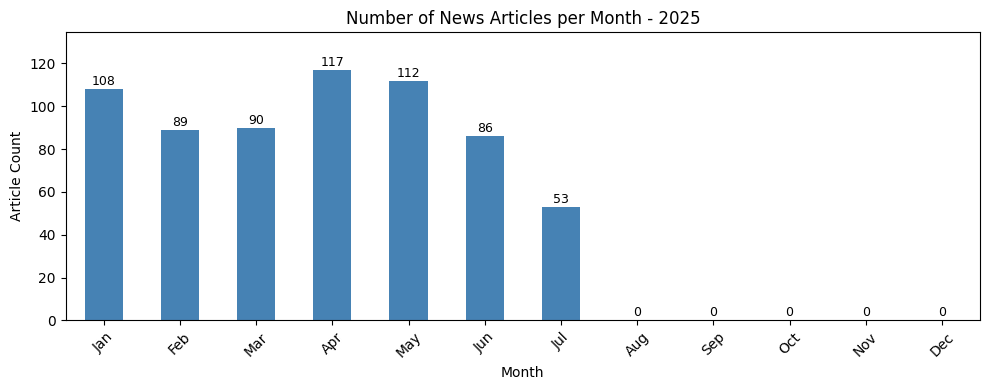

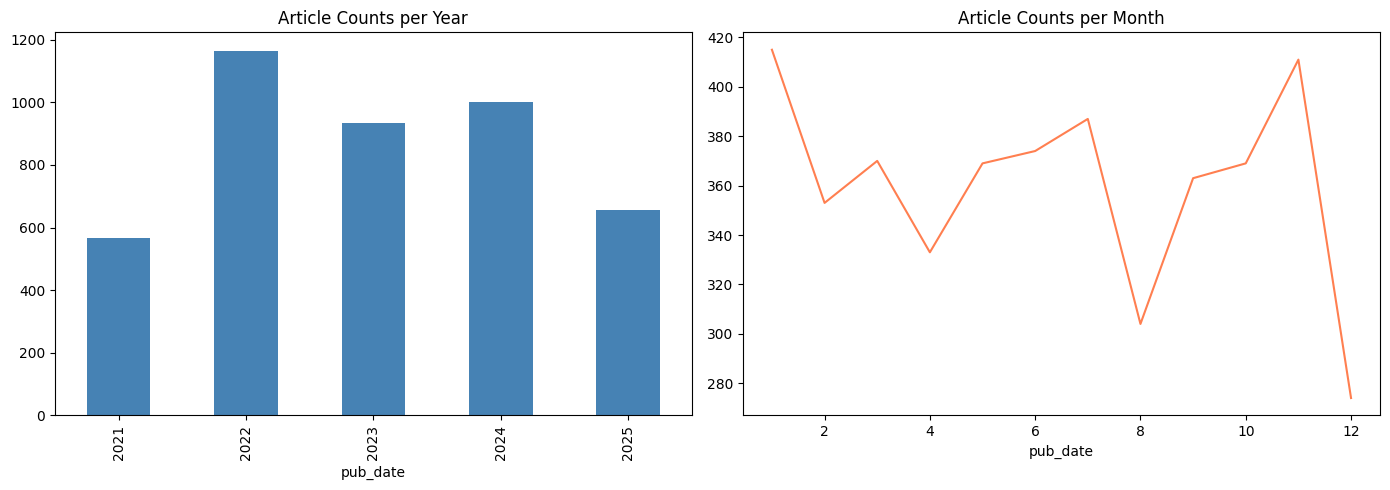

In [63]:
plot_monthly_articles_by_year(merged_df, 2021)
plot_monthly_articles_by_year(merged_df, 2022)
plot_monthly_articles_by_year(merged_df, 2023)
plot_monthly_articles_by_year(merged_df, 2024)
plot_monthly_articles_by_year(merged_df, 2025)

# Yearly and monthly aggregated plots (you need to define `yearly_counts` and `monthly_counts`)
yearly_counts = merged_df['pub_date'].dt.year.value_counts().sort_index()
monthly_counts = merged_df['pub_date'].dt.month.value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
yearly_counts.plot(kind='bar', ax=axes[0], color='steelblue', title='Article Counts per Year')
monthly_counts.plot(kind='line', ax=axes[1], color='coral', title='Article Counts per Month')
...
plt.tight_layout()
plt.show()

### **Plot Categorical Distributions**

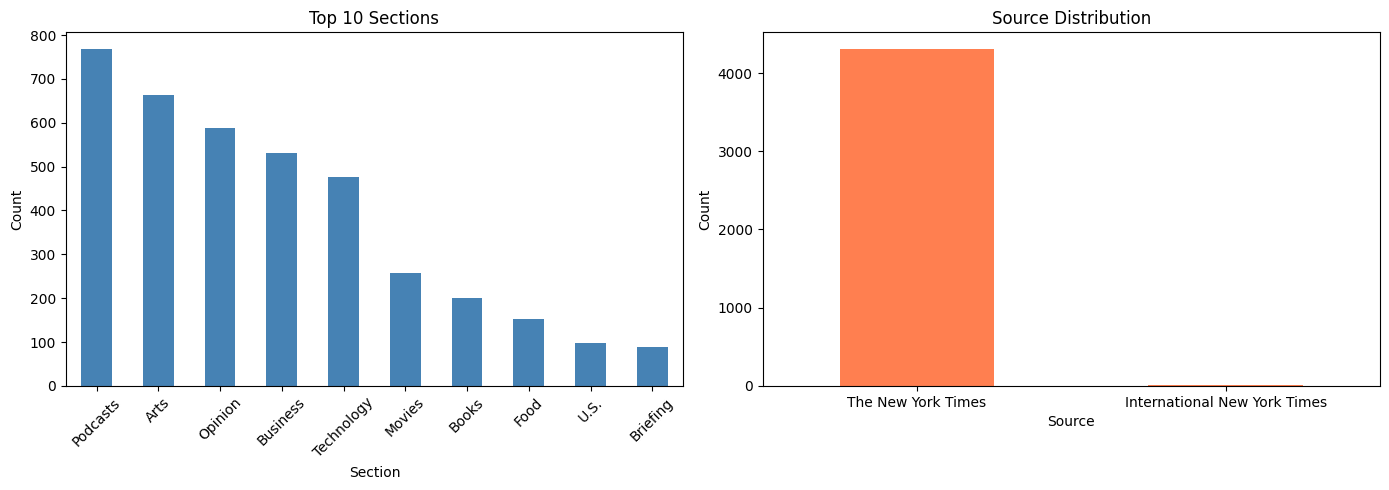

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

merged_df['section'].value_counts().head(10).plot(
    kind='bar', ax=axes[0], title='Top 10 Sections', color='steelblue'
)
axes[0].set_xlabel('Section')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

merged_df['source'].value_counts().plot(
    kind='bar', ax=axes[1], title='Source Distribution', color='coral'
)
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### **Word Distributions**

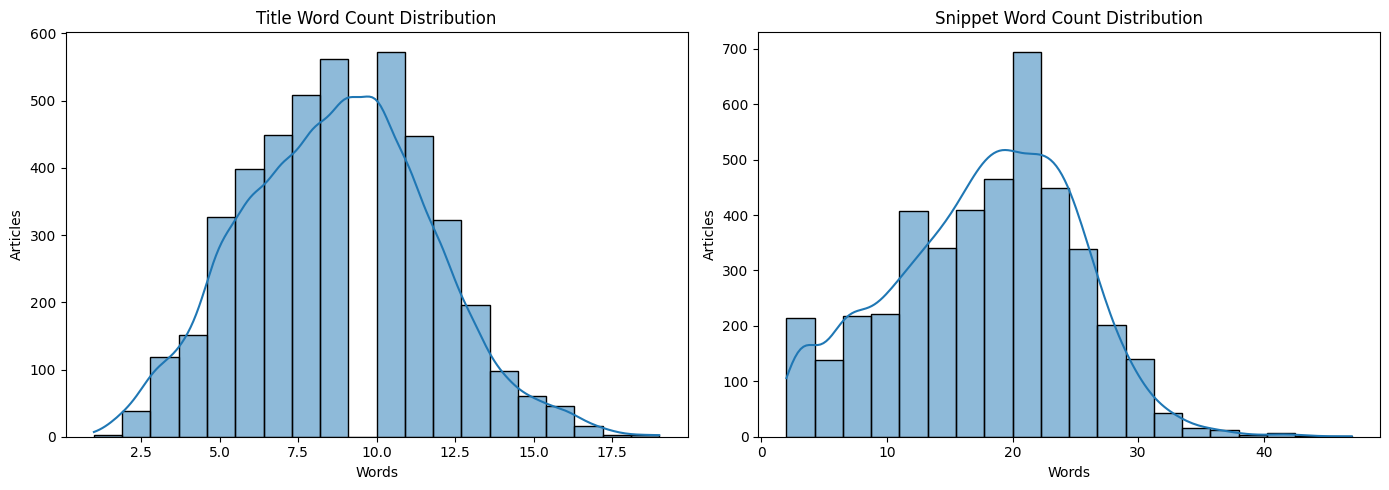

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

merged_df['title_word_count'] = merged_df['title'].apply(lambda x: len(str(x).split()))
merged_df['snippet_word_count'] = merged_df['snippet'].apply(lambda x: len(str(x).split()))

sns.histplot(merged_df['title_word_count'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Title Word Count Distribution')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Articles')

sns.histplot(merged_df['snippet_word_count'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Snippet Word Count Distribution')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Articles')

plt.tight_layout()
plt.show()

### **CountVectorizer Word & N-Gram Analysis**

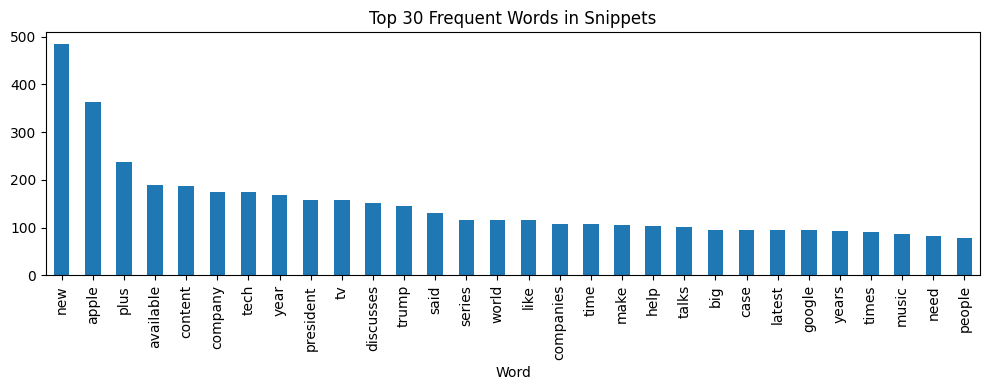

In [66]:
text_corpus = merged_df['snippet'].tolist()

vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(text_corpus)

word_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted_word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency']) \
  .set_index('Word').plot(kind='bar', figsize=(10, 4), legend=False)
plt.title("Top 30 Frequent Words in Snippets")
plt.tight_layout(); plt.show()

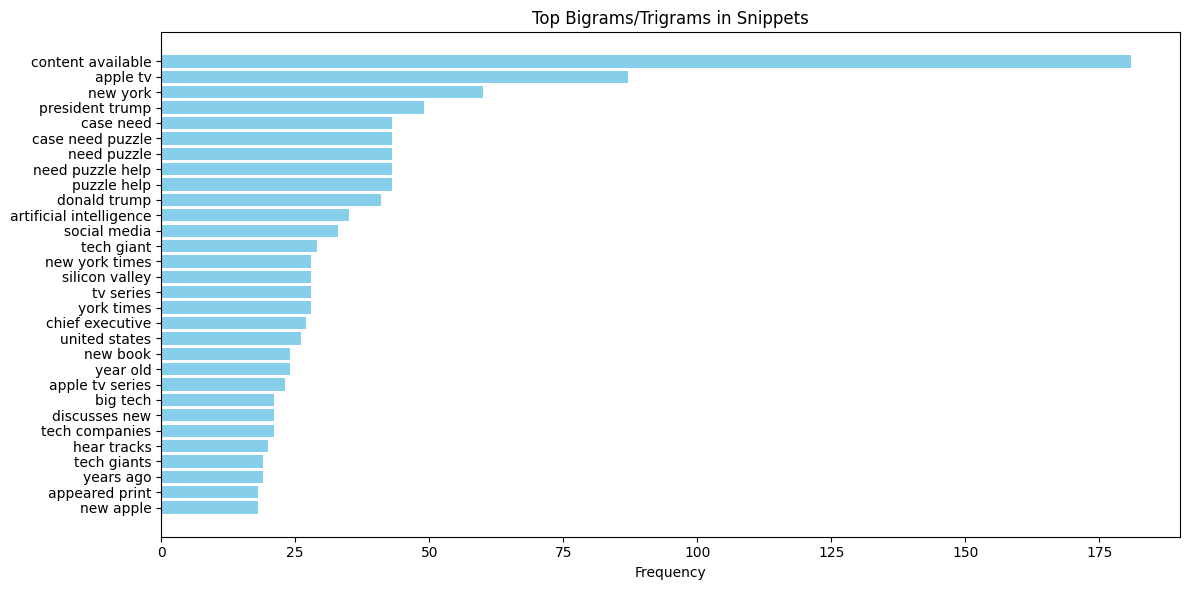

In [67]:
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_features=30)
X = vectorizer.fit_transform(text_corpus)

ngram_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

ngrams, freqs = zip(*sorted_ngrams)

plt.figure(figsize=(12, 6))
plt.barh(ngrams, freqs, color='skyblue')
plt.xlabel("Frequency")
plt.title("Top Bigrams/Trigrams in Snippets")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Save processed CSV**

In [68]:
merged_df.to_csv("../data/news_merged.csv", index=False)

In [71]:
merged_df.head()

,title,snippet,pub_date,web_url,section,source,year,month,title_word_count,snippet_word_count
29,What Happens if There’s a Covid Outbreak at th...,Kara Swisher finds out why the 2020 Tokyo Game...,2021-07-19 09:00:10,https://www.nytimes.com/2021/07/19/opinion/swa...,Opinion,The New York Times,2021,7,10,26
587,This Conversation Will Change How You Think Ab...,Modern work culture is built on a broken model...,2021-07-20 09:00:07,https://www.nytimes.com/2021/07/20/opinion/ezr...,Opinion,The New York Times,2021,7,9,12
38,‘The New Bauhaus’ Review: Rethinking an Approa...,This documentary on the interdisciplinary arti...,2021-07-20 11:00:05,https://www.nytimes.com/2021/07/20/movies/the-...,Movies,The New York Times,2021,7,9,18
143,Apple delays its return to office as the Delta...,Employees are now expected to come back to the...,2021-07-20 15:42:40,https://www.nytimes.com/2021/07/20/technology/...,Technology,The New York Times,2021,7,11,19
142,Can Apple’s AirTags Find Lost Pets?,We look at the pros and cons of using Apple’s ...,2021-07-20 16:06:15,https://www.nytimes.com/2021/07/20/technology/...,Technology,The New York Times,2021,7,6,20
